# Dream

In [1]:
library(variancePartition)
library(BiocParallel)
library(edgeR)
library(limma)
library(tidyverse)
library(ggplot2)

Loading required package: ggplot2

Loading required package: limma

Loading required package: foreach

Loading required package: scales

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, 

In [2]:
options(repr.matrix.max.cols=100, repr.matrix.max.rows=100)

# Import CRISPRi CEV-v1 screening data

In [3]:
validation <- read.csv('/home/tdfair/Desktop/datatables/CEV-v1_counts.txt', header = TRUE, sep = ",", row.names=1)
validation

,sgID,gene_TSS,C3649_D0_counts,C3649_D10_rep1_counts,C3649_D10_rep2_counts,Pt5C_D0_counts,Pt5C_D10_rep1_counts,Pt5C_D10_rep2_counts,C3624K_D0_counts,C3624K_D10_rep1_counts,C3624K_D10_rep2_counts,C40280L_D0_counts,C40280L_D10_rep1_counts,C40280L_D10_rep2_counts,C40290F_D0_counts,C40290F_D10_rep1_counts,C40290F_D10_rep2_counts,C8861G_D0_counts,C8861G_D10_rep1_counts,C8861G_D10_rep2_counts,C3624K_D0_counts_TF,C3624K_D10_rep1_counts_TF,C3624K_D10_rep2_counts_TF,C8861G_D0_counts_TF,C8861G_D10_rep1_counts_TF,C8861G_D10_rep2_counts_TF,H1hESC_D0_counts,H1hESC_D10_rep1_counts,H1hESC_D10_rep2_counts,H20961B_D0_counts,H20961B_D10_rep1_counts,H20961B_D10_rep1_counts.1,H21792A_D0_counts,H21792A_D10_rep1_counts,H21792A_D10_rep2_counts,H23555A_D0_counts,H23555A_D10_rep1_counts,H23555A_D10_rep2_counts,H28126B_D0_counts,H28126B_D10_rep1_counts,H28126B_D10_rep2_counts,H23555A_D0_counts_TF,H23555A_D10_rep1_counts_TF,H23555A_D10_rep2_counts_TF,H20961B_D0_counts_TF,H20961B_D10_rep1_counts_TF,H20961B_D10_rep2_counts_TF,H28126B_D0_counts_TF,H28126B_D10_rep1_counts_TF,H28126B_D10_rep2_counts_TF
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AATF_-_35306340.23-P1P2,AATF_-_35306340.23-P1P2,AATF__P1P2,603,194,158,335,99,64,696,51,190,1437,1361,1236,1670,1248,1254,176,6,38,2035,170,159,508,174,169,202,136,247,983,165,165,463,53,22,838,107,284,1664,2930,3631,592,297,477,1074,188,303,3192,576,1364
AATF_-_35306346.23-P1P2,AATF_-_35306346.23-P1P2,AATF__P1P2,493,101,93,238,25,32,627,28,55,258,20,16,892,97,51,99,30,1,1659,130,192,294,49,65,192,112,125,759,135,135,471,26,9,573,58,95,1522,2188,1924,461,134,196,592,156,86,1070,249,125
AATF_-_35306333.23-P1P2,AATF_-_35306333.23-P1P2,AATF__P1P2,550,242,176,263,83,74,637,34,37,1405,1715,1492,1122,2080,1133,107,3,4,1690,109,155,263,125,164,206,126,184,696,102,102,255,6,3,647,124,74,587,150,253,542,247,256,667,80,129,403,104,27
AATF_-_35306312.23-P1P2,AATF_-_35306312.23-P1P2,AATF__P1P2,643,101,151,288,16,49,624,23,23,247,24,4,763,21,14,112,1,42,2169,138,233,303,111,183,1312,1637,2036,1578,2048,2048,270,174,37,732,70,155,1707,4254,3172,443,240,103,3641,3479,3350,3165,1413,2052
AATF__P1P2__secondary__FWD__35,AATF__P1P2__secondary__FWD__35,AATF__P1P2,608,267,247,271,283,259,814,50,79,387,148,123,1138,363,323,185,27,94,2311,201,426,957,168,229,273,142,133,1542,290,290,1650,174,144,1595,88,236,1065,799,929,1276,475,347,2035,377,203,1499,169,140
AATF__P1P2__secondary__FWD__50,AATF__P1P2__secondary__FWD__50,AATF__P1P2,626,234,182,321,183,314,826,20,33,490,44,69,1257,405,211,276,49,56,2895,369,375,991,272,159,281,243,195,1481,288,288,1604,223,285,1430,254,56,1264,1059,750,1280,337,301,2343,480,285,1269,170,207
AATF__P1P2__secondary__FWD__53,AATF__P1P2__secondary__FWD__53,AATF__P1P2,597,238,260,353,450,397,837,103,82,587,93,88,1296,677,562,435,160,214,1902,252,507,1651,282,180,358,273,252,1553,269,269,1815,226,219,1348,97,138,1137,658,1010,1219,560,311,1871,605,416,1085,32,96
AATF__P1P2__secondary__FWD__55,AATF__P1P2__secondary__FWD__55,AATF__P1P2,715,400,516,325,463,332,978,106,145,607,203,105,1422,905,677,462,212,81,3718,357,670,1535,719,448,438,234,305,1622,408,408,1932,305,275,1819,123,103,1483,1071,1429,1768,289,399,2907,758,589,1953,218,84
ABCB10__P1P2__primary__RVS__7,ABCB10__P1P2__primary__RVS__7,ABCB10__P1P2,694,1800,1503,296,1932,1461,1032,1497,1405,1305,2598,1985,1370,1999,1908,1137,2031,1524,2899,3607,3991,3169,2201,1984,1123,978,1350,1578,1776,1776,3098,2103,2356,2067,2397,2621,1524,3346,2940,3789,3857,4661,3402,3787,3343,3202,2412,2336


# Counts matrix & metadata table

In [4]:
counts <- validation[, 3:ncol(validation)]

In [5]:
metaData <- data.frame(species = c(rep(c('chimpanzee'), times=24), rep(c('human'), times=24)),
                       cell_line = sapply(colnames(counts), function(x) unlist(strsplit(toString(x), split = "_", fixed = TRUE))[1]), 
                       time_point = rep(c('t0','tfinal','tfinal'), times=16), 
                       lab = c(rep(c('MIT'), times=18), rep(c('UCSF'), times=6), rep(c('MIT'), times=15), rep(c('UCSF'), times=9)))
metaData

,species,cell_line,time_point,lab
,<fct>,<fct>,<fct>,<fct>
C3649_D0_counts,chimpanzee,C3649,t0,MIT
C3649_D10_rep1_counts,chimpanzee,C3649,tfinal,MIT
C3649_D10_rep2_counts,chimpanzee,C3649,tfinal,MIT
Pt5C_D0_counts,chimpanzee,Pt5C,t0,MIT
Pt5C_D10_rep1_counts,chimpanzee,Pt5C,tfinal,MIT
Pt5C_D10_rep2_counts,chimpanzee,Pt5C,tfinal,MIT
C3624K_D0_counts,chimpanzee,C3624K,t0,MIT
C3624K_D10_rep1_counts,chimpanzee,C3624K,tfinal,MIT
C3624K_D10_rep2_counts,chimpanzee,C3624K,tfinal,MIT


In [6]:
#merge species and timepoint

metaData <- transform(metaData, species_time = paste(species,time_point, sep="_"))
metaData

,species,cell_line,time_point,lab,species_time
,<fct>,<fct>,<fct>,<fct>,<fct>
C3649_D0_counts,chimpanzee,C3649,t0,MIT,chimpanzee_t0
C3649_D10_rep1_counts,chimpanzee,C3649,tfinal,MIT,chimpanzee_tfinal
C3649_D10_rep2_counts,chimpanzee,C3649,tfinal,MIT,chimpanzee_tfinal
Pt5C_D0_counts,chimpanzee,Pt5C,t0,MIT,chimpanzee_t0
Pt5C_D10_rep1_counts,chimpanzee,Pt5C,tfinal,MIT,chimpanzee_tfinal
Pt5C_D10_rep2_counts,chimpanzee,Pt5C,tfinal,MIT,chimpanzee_tfinal
C3624K_D0_counts,chimpanzee,C3624K,t0,MIT,chimpanzee_t0
C3624K_D10_rep1_counts,chimpanzee,C3624K,tfinal,MIT,chimpanzee_tfinal
C3624K_D10_rep2_counts,chimpanzee,C3624K,tfinal,MIT,chimpanzee_tfinal


# Dream

Hoffman and Roussos, *Bioinformatics* 2021

In [7]:
param = SnowParam(20, "SOCK", progressbar=TRUE)
register(param)

In [8]:
#drop C3649 and Pt5-C

metaData_reduced <- metaData[-c(1:6), ]

In [9]:
dge <- DGEList(counts = counts[, metaData_reduced %>% rownames])
dge <- calcNormFactors(dge)

In [10]:
#treat individuals as random effects

form <- ~ species_time + (1|cell_line)

Memory usage to store result: >43 Mb

Dividing work into 100 chunks...

iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100



Total:47 s



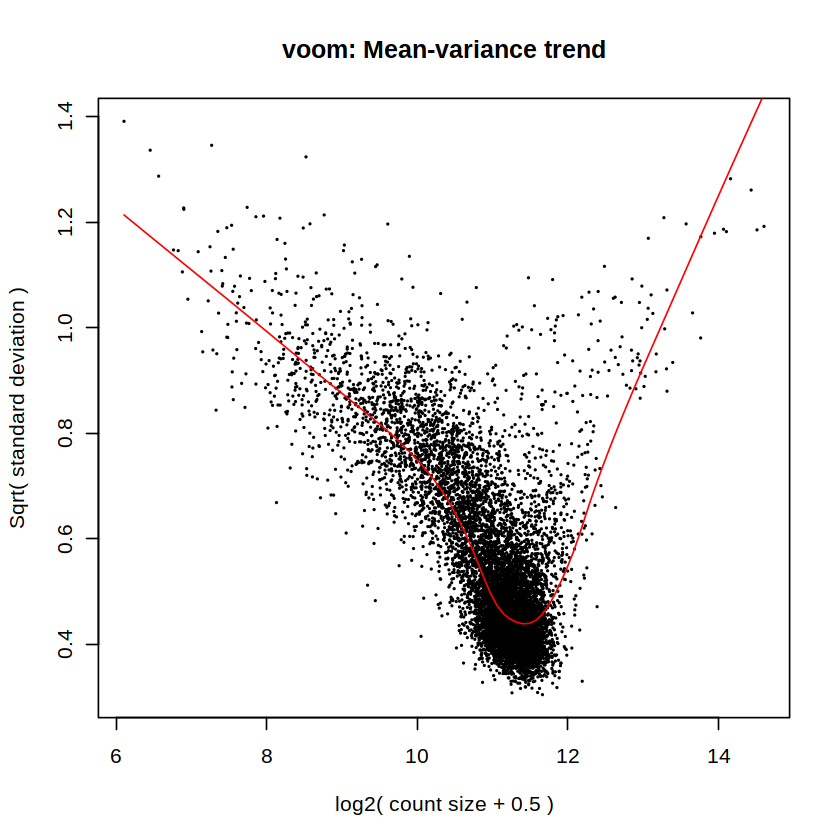

In [11]:
voom_dream_counts <- voomWithDreamWeights(dge, form, metaData_reduced, plot=TRUE)

# variancePartition

Dividing work into 100 chunks...

iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100



Total:60 s



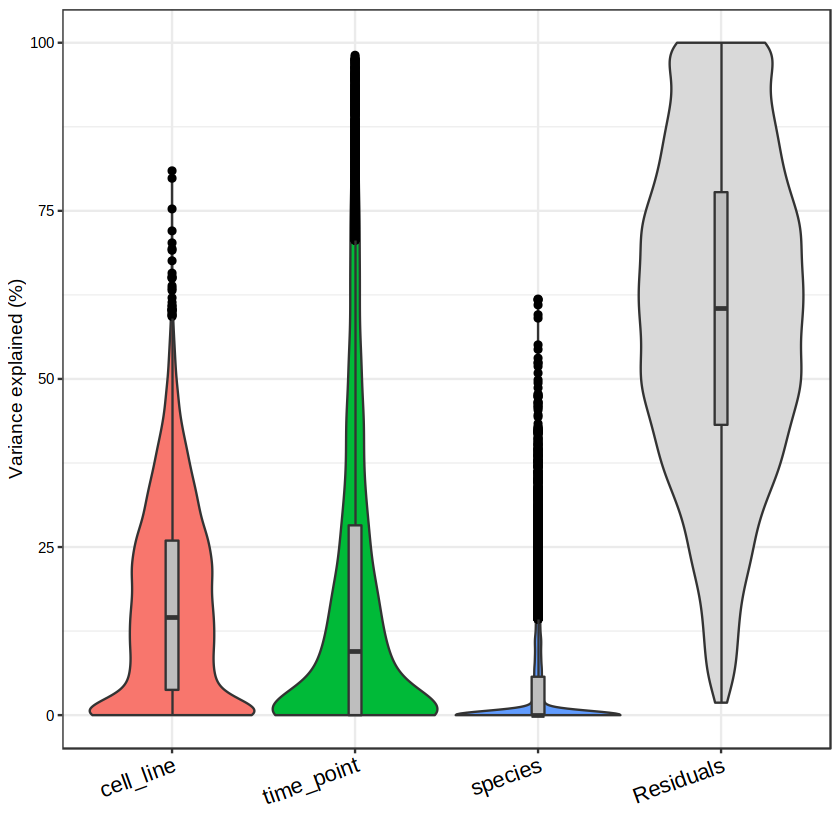

In [12]:
#model categorical variables as random effects

form2 <- ~ (1 | cell_line) + (1 | species) + (1 | time_point)

vp <- fitExtractVarPartModel(voom_dream_counts, form2, metaData_reduced)

plotVarPart(sortCols(vp))

In [13]:
vp_df <- cbind(validation[, 1:2], vp)
setdiff(vp_df$sgID,rownames(vp_df))

character(0)

In [14]:
write.csv(vp_df,'/home/tdfair/Desktop/datatables/Dream_variancePartition_CEV-v1.csv', row.names = FALSE)

In [15]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/tdfair/anaconda3/envs/r_latest/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] forcats_0.5.0            stringr_1.4.0            dplyr_1.0.1             
 [4] purrr_0.3.4              readr_1.3.1              tidyr_1.1.1             
 [7] tibble_3.0.3             tidyverse_1.3.0          edgeR_3.28.1            
[10] BiocParallel_1.20.1      variancePartiti